#Importing all the Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Data

In [6]:
df=pd.read_csv("SalesFINAL12312016.csv")

In [3]:
df.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/1/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2.0,32.98,16.49,1/2/2016,750.0,1.0,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/3/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,14.49,14.49,1/8/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2.0,69.98,34.99,1/9/2016,375.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY


In [7]:
df.shape

(43049, 14)

In [8]:
df.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,43049.000000,43049.000000,43049.000000,43049.000000,43048.000000,43048.000000,43048.000000,43048.000000,43048.000000
mean,6.460127,12061.951451,2.434040,31.182623,15.457753,916.949289,1.416512,1.288704,6974.875906
std,4.595913,12110.201157,3.489268,57.539063,12.616915,656.533076,0.492986,3.039252,8413.473843
min,1.000000,58.000000,1.000000,0.990000,0.990000,50.000000,1.000000,0.010000,105.000000
25%,1.000000,3529.000000,1.000000,10.990000,8.990000,750.000000,1.000000,0.210000,3252.000000
50%,10.000000,6021.000000,1.000000,17.990000,12.990000,750.000000,1.000000,0.680000,4425.000000
75%,10.000000,18347.000000,2.000000,32.970000,18.990000,1000.000000,2.000000,1.570000,9552.000000
max,11.000000,47090.000000,143.000000,4499.400000,349.990000,5000.000000,2.000000,220.500000,98450.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43049 entries, 0 to 43048
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InventoryId     43049 non-null  object 
 1   Store           43049 non-null  int64  
 2   Brand           43049 non-null  int64  
 3   Description     43049 non-null  object 
 4   Size            43049 non-null  object 
 5   SalesQuantity   43049 non-null  int64  
 6   SalesDollars    43049 non-null  float64
 7   SalesPrice      43048 non-null  float64
 8   SalesDate       43048 non-null  object 
 9   Volume          43048 non-null  float64
 10  Classification  43048 non-null  float64
 11  ExciseTax       43048 non-null  float64
 12  VendorNo        43048 non-null  float64
 13  VendorName      43048 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 4.6+ MB


#Converting SalesData object data type to DateTime datatype

In [10]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

In [11]:
df = df.drop(['VendorName', 'InventoryId', 'Description', 'VendorNo'], axis=1)


In [12]:
df.head()

,Store,Brand,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax
0,1,1004,750mL,1,16.49,16.49,2016-01-01,750.0,1.0,0.79
1,1,1004,750mL,2,32.98,16.49,2016-01-02,750.0,1.0,1.57
2,1,1004,750mL,1,16.49,16.49,2016-01-03,750.0,1.0,0.79
3,1,1004,750mL,1,14.49,14.49,2016-01-08,750.0,1.0,0.79
4,1,1005,375mL 2 Pk,2,69.98,34.99,2016-01-09,375.0,1.0,0.79


In [13]:
def check_unique(df):
    for col in df.columns:
        print(col, df[col].unique())

In [14]:
check_unique(df)

Store [ 1 10 11]
Brand [ 1004  1005 10058 ... 37421 37785 37842]
Size ['750mL' '375mL 2 Pk' '50mL 4 Pk' '750mL 3 Pk' '375mL 3 Pk' '750mL + 3/'
 '200mL 3 Pk' '1.5L' '5L' 'Liter' '50mL 3 Pk' '100mL 4 Pk' '1.75L' '3L'
 '375mL' '50mL' '100mL' '50mL 5 Pk' '187mL' '500mL' '187mL 4 Pk'
 '250mL 4 Pk' '750mL 2 Pk' '200mL' '3/100mL' '200mL 4 Pk' '4L' '5.0 Oz'
 '187mL 3 Pk' '750mL + 2/' '300mL' '720mL' '50mL 12 Pk' '330mL' '250mL']
SalesQuantity [  1   2   4   3  12   6  10  36   7   5   8  14   9  15  20  13  32  17
  11  18  16  21  72  24  31  26  83  25  23  28  29  22  19  57  27  35
  89 120  33  30  42  53 143  49  38  34  86  85  50  65  41  43  48  39
  40  67  60  37 102]
SalesDollars [ 16.49  32.98  14.49 ... 359.97 989.94  10.  ]
SalesPrice [ 16.49  14.49  34.99  14.99   3.99   8.99  49.99  18.99  26.99  24.99
  13.99  15.99  27.99   6.99  29.99  16.99   9.99  44.99  10.99  39.99
  21.99  12.99   6.29  11.99  17.99  99.99  31.99  22.99  42.99   7.95
  19.99  11.95   9.95  46.99  74.99

In [15]:
def check_null(df):
  for col in df.columns:
    nat_count = df[col].isna().sum()
    print(nat_count)

In [16]:
nat_count = df['SalesDate'].isna().sum()


In [17]:
df = df.dropna(subset=['SalesDate'])

In [18]:
check_null(df)

0
0
0
0
0
0
0
0
0
0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43048 entries, 0 to 43047
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           43048 non-null  int64         
 1   Brand           43048 non-null  int64         
 2   Size            43048 non-null  object        
 3   SalesQuantity   43048 non-null  int64         
 4   SalesDollars    43048 non-null  float64       
 5   SalesPrice      43048 non-null  float64       
 6   SalesDate       43048 non-null  datetime64[ns]
 7   Volume          43048 non-null  float64       
 8   Classification  43048 non-null  float64       
 9   ExciseTax       43048 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 3.6+ MB


In [20]:
import re

def parse_size(size_str):
    try:
        size_str = size_str.strip()

        # Handle L (liters)
        match = re.match(r'([\d.]+)\s*L', size_str, re.I)
        if match:
            return float(match.group(1)) * 1000

        # Handle mL (single unit or pack)
        match = re.match(r'([\d.]+)mL(?:\s*(\d+)\s*Pk)?', size_str, re.I)
        if match:
            vol = float(match.group(1))
            pack = int(match.group(2)) if match.group(2) else 1
            return vol  # per unit, keep per-unit volume

        # Handle Oz (convert to mL: 1 Oz ≈ 29.5735 mL)
        match = re.match(r'([\d.]+)\s*Oz', size_str, re.I)
        if match:
            return float(match.group(1)) * 29.5735

        return None  # Unrecognized format
    except:
        return None

# Apply to your DataFrame
df['Volume_mL_per_unit'] = df['Size'].apply(parse_size)


In [21]:
df['Volume_mL_per_unit'].unique()

array([ 750.    ,  375.    ,   50.    ,  200.    , 1500.    , 5000.    ,
             nan,  100.    , 1750.    , 3000.    ,  187.    ,  500.    ,
        250.    , 4000.    ,  147.8675,  300.    ,  720.    ,  330.    ])

In [22]:
df['Volume_mL_per_unit'].isnull().sum()

np.int64(1009)

In [23]:
check_null(df)

0
0
0
0
0
0
0
0
0
0
1009


In [24]:
df['Volume_mL_per_unit'].mode()

,Volume_mL_per_unit
0,750.0


In [25]:
df['Volume_mL_per_unit'].unique()

array([ 750.    ,  375.    ,   50.    ,  200.    , 1500.    , 5000.    ,
             nan,  100.    , 1750.    , 3000.    ,  187.    ,  500.    ,
        250.    , 4000.    ,  147.8675,  300.    ,  720.    ,  330.    ])

In [26]:
df['Volume_mL_per_unit'] = df['Volume_mL_per_unit'].fillna(df['Volume_mL_per_unit'].mode()[0])


#Extracting the Time

In [28]:
df['Year'] = df['SalesDate'].dt.year
df['Month'] = df['SalesDate'].dt.month
df['Day'] = df['SalesDate'].dt.day
df['Weekday'] = df['SalesDate'].dt.weekday

#Total sales

In [29]:
df['TotalSales'] = df['SalesQuantity'] * df['SalesPrice']


#Total Volume Sold

In [30]:
df['TotalVolumeSold'] = df['SalesQuantity'] * df['Volume_mL_per_unit']

#Features which are related to the SalesPrice

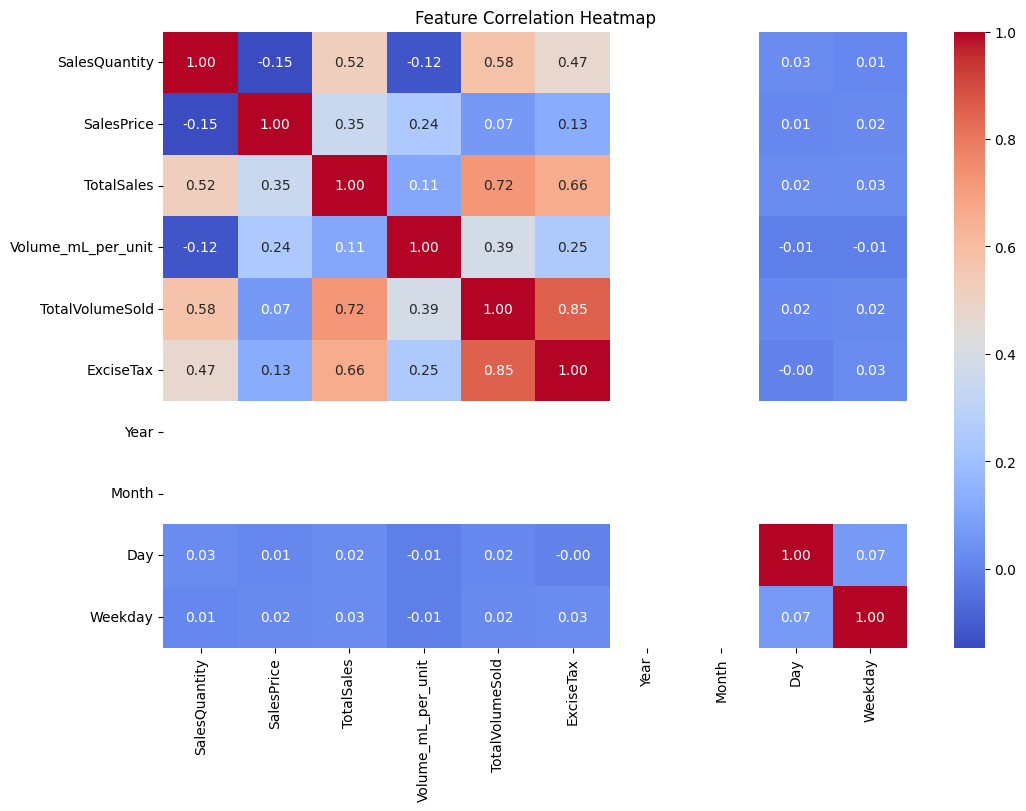

In [31]:
# Select numerical columns for heatmap
corr_df = df[['SalesQuantity', 'SalesPrice', 'TotalSales', 'Volume_mL_per_unit',
              'TotalVolumeSold', 'ExciseTax', 'Year', 'Month', 'Day', 'Weekday']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


#1st Question

#Demand Forecasting
#Analyze historical sales data to predict future demand.
#Use time-series models for accuracy.

#Prediction of Totalsales

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


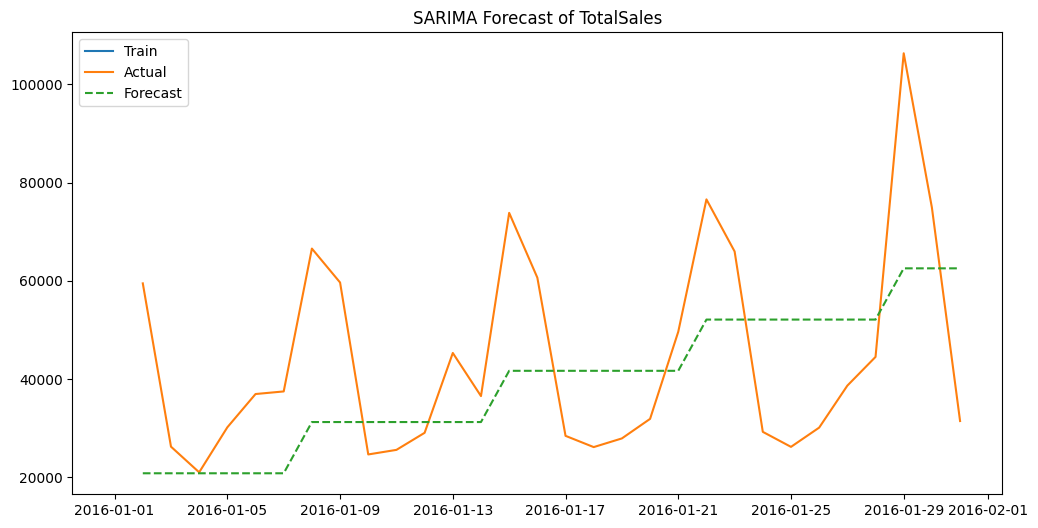

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Aggregate sales by date
sales_data = df.groupby('SalesDate')['TotalSales'].sum().asfreq('D')  # daily frequency

# Step 2: Train-test split
train = sales_data[:-30]
test = sales_data[-30:]

# Step 3: Fit SARIMA model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=30)

# Step 5: Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast of TotalSales')
plt.legend()
plt.show()


#Calculating the Accuracy

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming `test` is the actual and `forecast` is the predicted
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 17079.00
MSE: 413147413.55
RMSE: 20326.03
MAPE: 39.84%


In [40]:
df.head()

,Store,Brand,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,Volume_mL_per_unit,Year,Month,Day,Weekday,TotalSales,TotalVolumeSold
0,1,1004,750mL,1,16.49,16.49,2016-01-01,750.0,1.0,0.79,750.0,2016,1,1,4,16.49,750.0
1,1,1004,750mL,2,32.98,16.49,2016-01-02,750.0,1.0,1.57,750.0,2016,1,2,5,32.98,1500.0
2,1,1004,750mL,1,16.49,16.49,2016-01-03,750.0,1.0,0.79,750.0,2016,1,3,6,16.49,750.0
3,1,1004,750mL,1,14.49,14.49,2016-01-08,750.0,1.0,0.79,750.0,2016,1,8,4,14.49,750.0
4,1,1005,375mL 2 Pk,2,69.98,34.99,2016-01-09,375.0,1.0,0.79,375.0,2016,1,9,5,69.98,750.0


#2nd Question


#ABC Analysis Classify inventory into A (high value), B (moderate), and C (low priority).Prioritize high-value inventory management.

In [41]:
grouped = df.groupby('Brand').agg({'TotalSales': 'sum'}).reset_index()

In [42]:
grouped = grouped.sort_values(by='TotalSales', ascending=False)

In [43]:
grouped['CumulativeSales'] = grouped['TotalSales'].cumsum()
grouped['CumulativePercentage'] = 100 * grouped['CumulativeSales'] / grouped['TotalSales'].sum()

In [44]:
def classify(row):
    if row['CumulativePercentage'] <= 70:
        return 'A'
    elif row['CumulativePercentage'] <= 90:
        return 'B'
    else:
        return 'C'

grouped['ABC_Class'] = grouped.apply(classify, axis=1)

<ipython-input-47-d1f82b760f43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=abc_counts.index, y=abc_counts.values, palette="Set2")


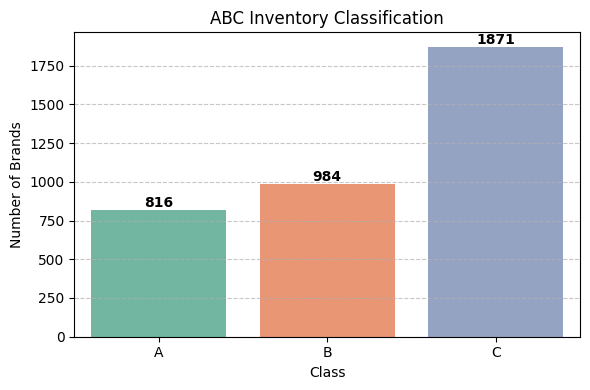

In [47]:
# Count of brands in each class
abc_counts = grouped['ABC_Class'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x=abc_counts.index, y=abc_counts.values, palette="Set2")

# Add value labels on top of each bar
for i, value in enumerate(abc_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.title('ABC Inventory Classification')
plt.xlabel('Class')
plt.ylabel('Number of Brands')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


#4th Question

#Reorder Point Analysis
#Determine reorder points for each product to avoid stockouts.
#Factor in lead time to ensure continuity.

In [48]:

df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Group by product and day
daily_sales = df.groupby(['Brand', 'Size', 'SalesDate'])['SalesQuantity'].sum().reset_index()

# Calculate average daily sales per product
avg_daily_demand = daily_sales.groupby(['Brand', 'Size'])['SalesQuantity'].mean().reset_index()
avg_daily_demand.rename(columns={'SalesQuantity': 'AvgDailySales'}, inplace=True)


In [49]:
avg_daily_demand['LeadTime_days'] = 7
avg_daily_demand['SafetyStock'] = 5


In [50]:
avg_daily_demand['ReorderPoint'] = (
    avg_daily_demand['AvgDailySales'] * avg_daily_demand['LeadTime_days']
) + avg_daily_demand['SafetyStock']


In [51]:
print(avg_daily_demand[['Brand', 'Size', 'AvgDailySales', 'LeadTime_days', 'SafetyStock', 'ReorderPoint']])


      Brand   Size  AvgDailySales  LeadTime_days  SafetyStock  ReorderPoint
0        58  750mL       1.500000              7            5     15.500000
1        60  750mL       1.400000              7            5     14.800000
2        62  750mL       1.555556              7            5     15.888889
3        63  750mL       1.666667              7            5     16.666667
4        75  750mL       1.000000              7            5     12.000000
...     ...    ...            ...            ...          ...           ...
3666  46934  750mL       1.615385              7            5     16.307692
3667  47009  750mL       1.000000              7            5     12.000000
3668  47014  750mL       2.500000              7            5     22.500000
3669  47027   1.5L       1.000000              7            5     12.000000
3670  47090  750mL       1.000000              7            5     12.000000

[3671 rows x 6 columns]


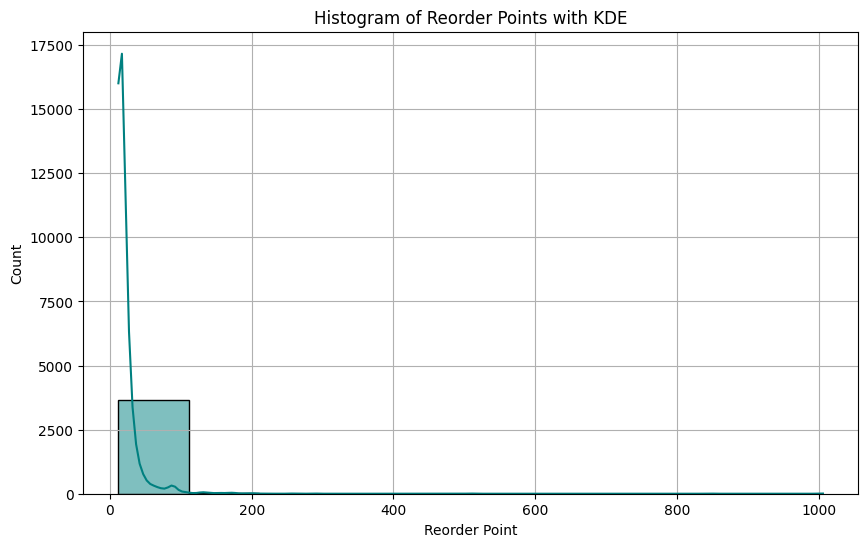

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(avg_daily_demand['ReorderPoint'], bins=10, kde=True, color='teal')
plt.title('Histogram of Reorder Points with KDE')
plt.xlabel('Reorder Point')
plt.ylabel('Count')
plt.grid(True)
plt.show()


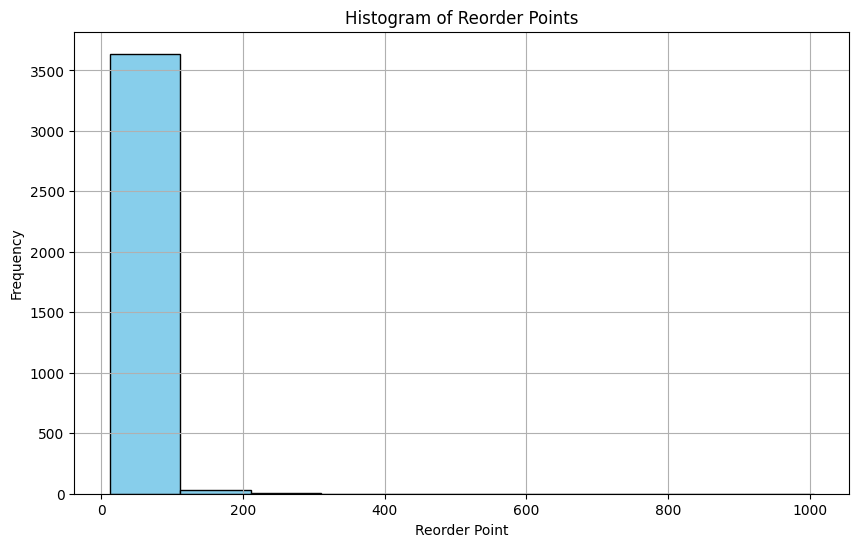

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(avg_daily_demand['ReorderPoint'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Reorder Points')
plt.xlabel('Reorder Point')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Here InvoicePurchase Data is used

In [3]:
df1=pd.read_csv('/content/InvoicePurchases12312016.csv')

In [4]:
df1.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [5]:
df1['Approval'].isnull().sum()

np.int64(5169)

In [6]:
df1.shape

(5543, 10)

In [7]:
df1=df1.drop(['PONumber','Quantity','Dollars','Freight','Approval'],axis=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VendorNumber  5543 non-null   int64 
 1   VendorName    5543 non-null   object
 2   InvoiceDate   5543 non-null   object
 3   PODate        5543 non-null   object
 4   PayDate       5543 non-null   object
dtypes: int64(1), object(4)
memory usage: 216.7+ KB


In [9]:
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])
df1['PODate']=pd.to_datetime(df1['PODate'])
df1['PayDate']=pd.to_datetime(df1['PayDate'])

In [10]:
df1.head()

,VendorNumber,VendorName,InvoiceDate,PODate,PayDate
0,105,ALTAMAR BRANDS LLC,2016-01-04,2015-12-21,2016-02-16
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,2015-12-22,2016-02-21
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,2015-12-24,2016-02-16
3,480,BACARDI USA INC,2016-01-12,2015-12-20,2016-02-05
4,516,BANFI PRODUCTS CORP,2016-01-07,2015-12-24,2016-02-12


#5th Question
#Lead Time Analysis
#Optimize supply chain efficiency by assessing material procurement timelines.
#Reduce waiting periods for production inputs.

#Lead time analysis of top 5 Vendor

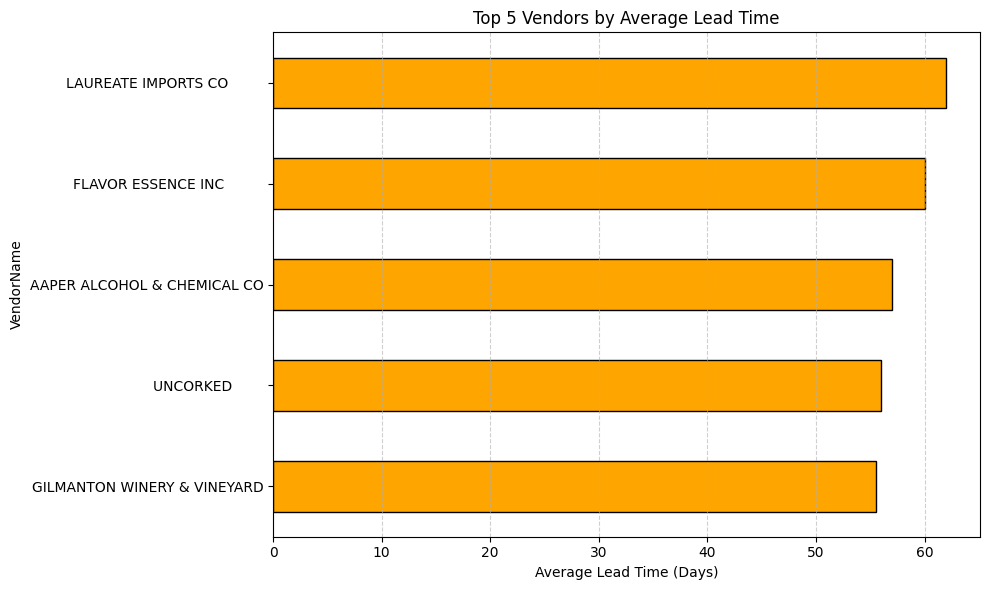

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df=df1

# Step 2: Convert dates to datetime
df['PODate'] = pd.to_datetime(df['PODate'], errors='coerce')
df['PayDate'] = pd.to_datetime(df['PayDate'], errors='coerce')

# Step 3: Drop rows with missing or invalid dates
df = df.dropna(subset=['PODate', 'PayDate'])

# Step 4: Calculate lead time in days
df['LeadTime_Days'] = (df['PayDate'] - df['PODate']).dt.days

# Step 5: Group by VendorName and calculate average lead time
avg_lead = df.groupby('VendorName')['LeadTime_Days'].mean()

# Step 6: Get top 5 vendors with highest average lead time
top5_vendors = avg_lead.sort_values(ascending=False).head(5)

# Step 7: Plot
plt.figure(figsize=(10, 6))
top5_vendors.plot(kind='barh', color='orange', edgecolor='black')
plt.xlabel('Average Lead Time (Days)')
plt.title('Top 5 Vendors by Average Lead Time')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Additional insite

#top 5 late payment vendors

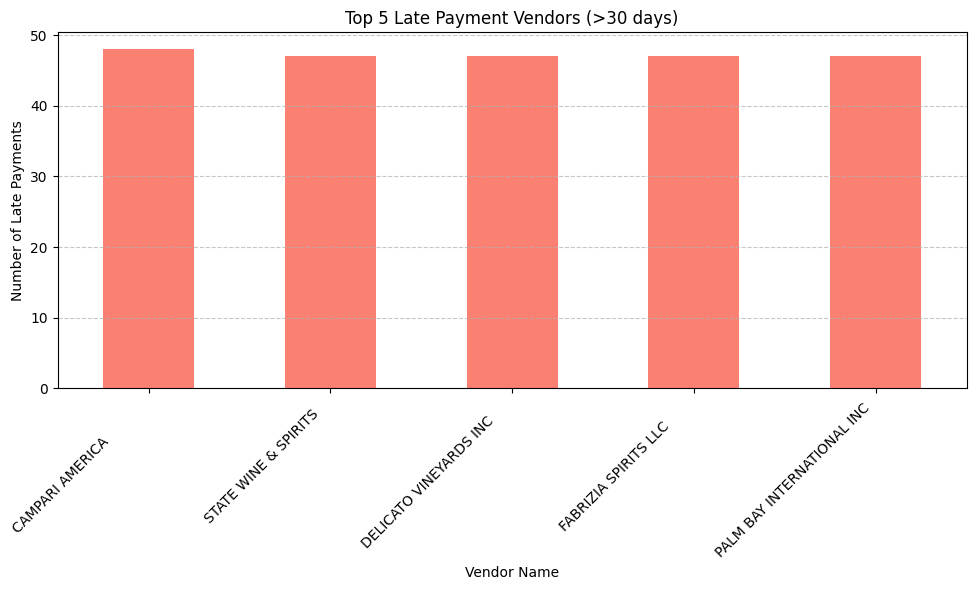

In [12]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['PayDate'] = pd.to_datetime(df['PayDate'])

# Step 1: Calculate Processing Time (in days)
df['Processing Time'] = (df['PayDate'] - df['InvoiceDate']).dt.days

# Step 2: Filter for late payments (> 30 days)
late_df = df[df['Processing Time'] > 30]

# Step 3: Count top 5 late payment vendors
top_late_vendors = late_df['VendorName'].value_counts().head(5)

# Step 4: Plot
plt.figure(figsize=(10, 6))
top_late_vendors.plot(kind='bar', color='salmon')
plt.title('Top 5 Late Payment Vendors (>30 days)')
plt.xlabel('Vendor Name')
plt.ylabel('Number of Late Payments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


#5 vendors by number of POs

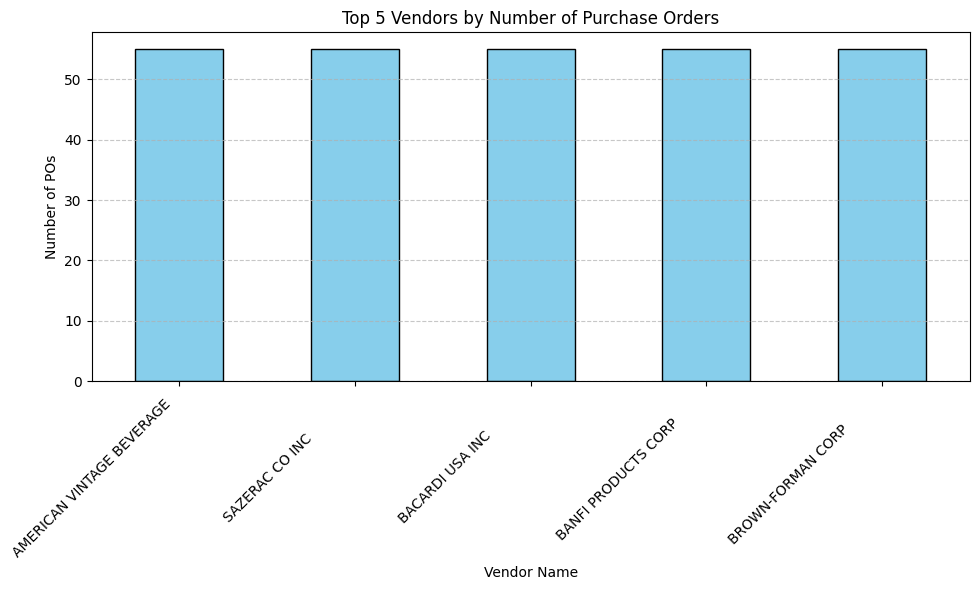

In [14]:


#Count how many times each Vendor appears (i.e., number of POs)
top_vendors = df['VendorName'].value_counts().head(5)

# Plot as histogram-style bar chart
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Vendors by Number of Purchase Orders')
plt.xlabel('Vendor Name')
plt.ylabel('Number of POs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Using BegInvFinal Data set

#3rd Question

#Economic Order Quantity (EOQ) Analysis
#Calculate optimal order quantity to minimize ordering & carrying costs.
#Implement just-in-time inventory practices where feasible.

In [16]:
df2=pd.read_csv('/content/BegInvFINAL12312016.csv')

In [20]:
df2=df2.drop(['Store', 'City', 'Brand', 'Size', 'startDate'],axis=True)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Description  206529 non-null  object 
 2   onHand       206529 non-null  int64  
 3   Price        206529 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ MB


In [22]:
df2.head()

,InventoryId,Description,onHand,Price
0,1_HARDERSFIELD_58,Gekkeikan Black & Gold Sake,8,12.99
1,1_HARDERSFIELD_60,Canadian Club 1858 VAP,7,10.99
2,1_HARDERSFIELD_62,Herradura Silver Tequila,6,36.99
3,1_HARDERSFIELD_63,Herradura Reposado Tequila,3,38.99
4,1_HARDERSFIELD_72,No. 3 London Dry Gin,6,34.99


In [23]:
df2.isnull().sum()

,0
InventoryId,0
Description,0
onHand,0
Price,0


In [25]:
import numpy as np

df = df2

df['AnnualDemand'] = 1000

# Constants
ordering_cost = 50  # Fixed cost per order (update with real cost)
holding_cost_rate = 0.20  # 20% of price as holding cost

# Calculate Holding cost
df['HoldingCost'] = df['Price'] * holding_cost_rate

# Calculate EOQ
df['EOQ'] = np.sqrt((2 * df['AnnualDemand'] * ordering_cost) / df['HoldingCost'])

# Optional: Save result to a new CSV
df.to_csv('inventory_with_eoq.csv', index=False)

print(df[['InventoryId', 'Description', 'AnnualDemand', 'Price', 'HoldingCost', 'EOQ']].head())


         InventoryId                  Description  AnnualDemand  Price  \
0  1_HARDERSFIELD_58  Gekkeikan Black & Gold Sake          1000  12.99   
1  1_HARDERSFIELD_60       Canadian Club 1858 VAP          1000  10.99   
2  1_HARDERSFIELD_62     Herradura Silver Tequila          1000  36.99   
3  1_HARDERSFIELD_63   Herradura Reposado Tequila          1000  38.99   
4  1_HARDERSFIELD_72         No. 3 London Dry Gin          1000  34.99   

   HoldingCost         EOQ  
0        2.598  196.191608  
1        2.198  213.297692  
2        7.398  116.263351  
3        7.798  113.242223  
4        6.998  119.539939  


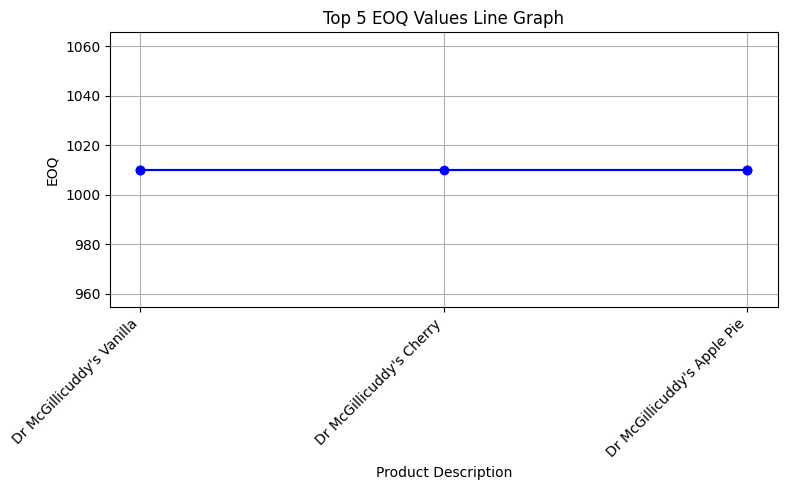

In [29]:
import matplotlib.pyplot as plt

# Filter out infinite and NaN values first
df_filtered = df[np.isfinite(df['EOQ'])]

# Get top 5 EOQ values
top5_eoq = df_filtered.sort_values(by='EOQ', ascending=False).head(5)

# Plot line graph
plt.figure(figsize=(8,5))
plt.plot(top5_eoq['Description'], top5_eoq['EOQ'], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Description')
plt.ylabel('EOQ')
plt.title('Top 5 EOQ Values Line Graph')
plt.grid(True)
plt.tight_layout()
plt.show()
